In [7]:
import numpy as np
import pandas as pd
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print(os.getcwd())

C:\Users\rjourney\Desktop\Jupyter Drills\Thinkful DRILLS


In [19]:
opioid = "Accidental_Drug_Related_Deaths__2012-2017(A).csv"
df = pd.read_csv(opioid)
df.head()

,Sex,Race,Age,DescriptionofInjury,ImmediateCauseA,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid
0,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,NaN,Y,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,White,45.0,NaN,Fentanyl Intoxication,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,White,30.0,NaN,Methadone and Cocaine Intoxication,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN
3,Male,White,27.0,NaN,Intoxication due to the combined effects of Ox...,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,White,21.0,NaN,Multiple Drug Toxicity,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
Male_Deaths = df.loc[(df['Sex']=='Male')]
Women_Deaths = df.loc[(df['Sex']=='Female')]

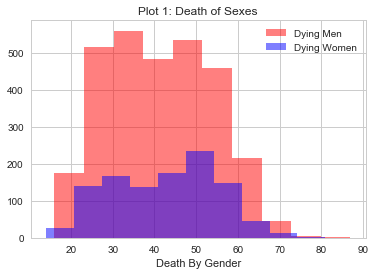

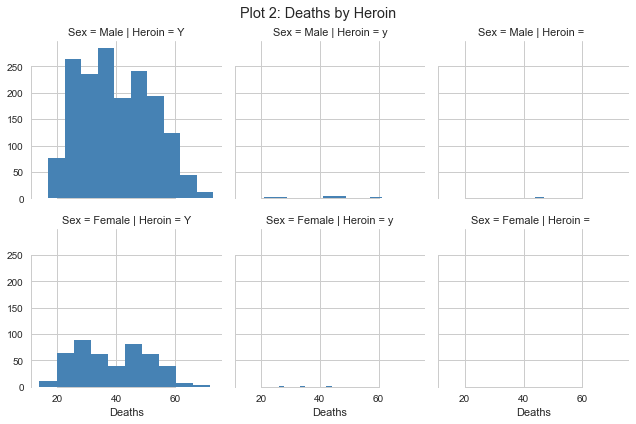

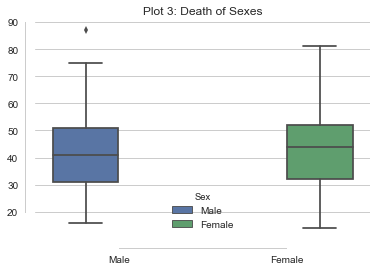

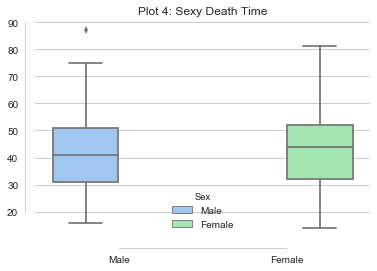

In [42]:
# Plot 1
plt.hist(Male_Deaths['Age'].dropna(), color='red',  alpha=.5,label='Dying Men')
plt.hist(Women_Deaths['Age'].dropna(), color='blue', alpha=.5,label='Dying Women')
plt.xlabel('Death By Gender')
plt.legend(loc='upper right')
plt.title('Plot 1: Death of Sexes')
plt.show()

# Plot 2
g = sns.FacetGrid(df, row="Sex", col="Heroin")
g.map(plt.hist, "Age", color="steelblue",  lw=0)
plt.subplots_adjust(top=0.9)
g.set_axis_labels('Deaths')
plt.suptitle('Plot 2: Deaths by Heroin')
sns.despine(trim=True)
plt.show()

# Plot 3
ax = sns.boxplot(x='Sex',y='Age',hue='Sex',data=df)  
plt.title('Plot 3: Death of Sexes')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='')
plt.show()

# Plot 4
sns.set(style="whitegrid")
ax = sns.boxplot(x='Sex',y='Age',hue='Sex',data=df,palette='pastel')  
plt.title('Plot 4: Sexy Death Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='')
plt.show()

ValueError: could not convert string to float: 'Male'

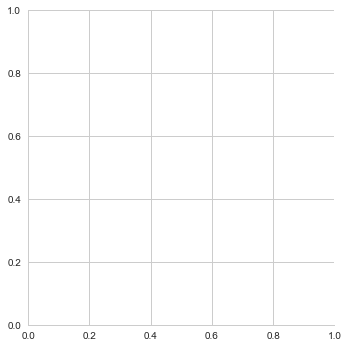

In [49]:
g = sns.lmplot(y='Age', # Variable 1.
               x='Sex', # Variable 2.
               data=df, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Age")
g.set_xlabels("Sex")
plt.title('Scatterplot: Age & Sex Correlates to Death?')
plt.show()

g = sns.lmplot(y='Age', 
               x='Sex',
               data=df, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Age")
g.set_xlabels("Sex")
plt.title('Scatterplot with regression line: Age & Sex Correlates to Death?')
plt.show()

ValueError: could not convert string to float: 'Male'

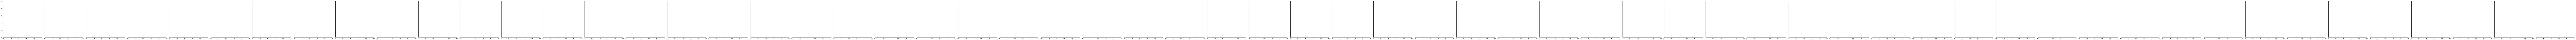

In [54]:
# Setting the overall aesthetic.
sns.set(style="white")

g = sns.lmplot(y='Age', 
               x='Sex',
               hue='Sex',
               data=df, # Data.
               col='Age',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Age")
g.set_xlabels("Sex")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='Age', 
               x='Sex',
               hue='Sex',
               data=df, # Data.
               col='Age',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Age")
g.set_xlabels("Sex")
plt.suptitle('Scatterplot Lowess: Meal Tips by Total Bill, split by time and gender')
plt.subplots_adjust(top=0.9)
plt.show()